## Step0: E-Commerce 영역과 플랫폼 서비스의 데이터

### E-Commerce & Platform Business 란?

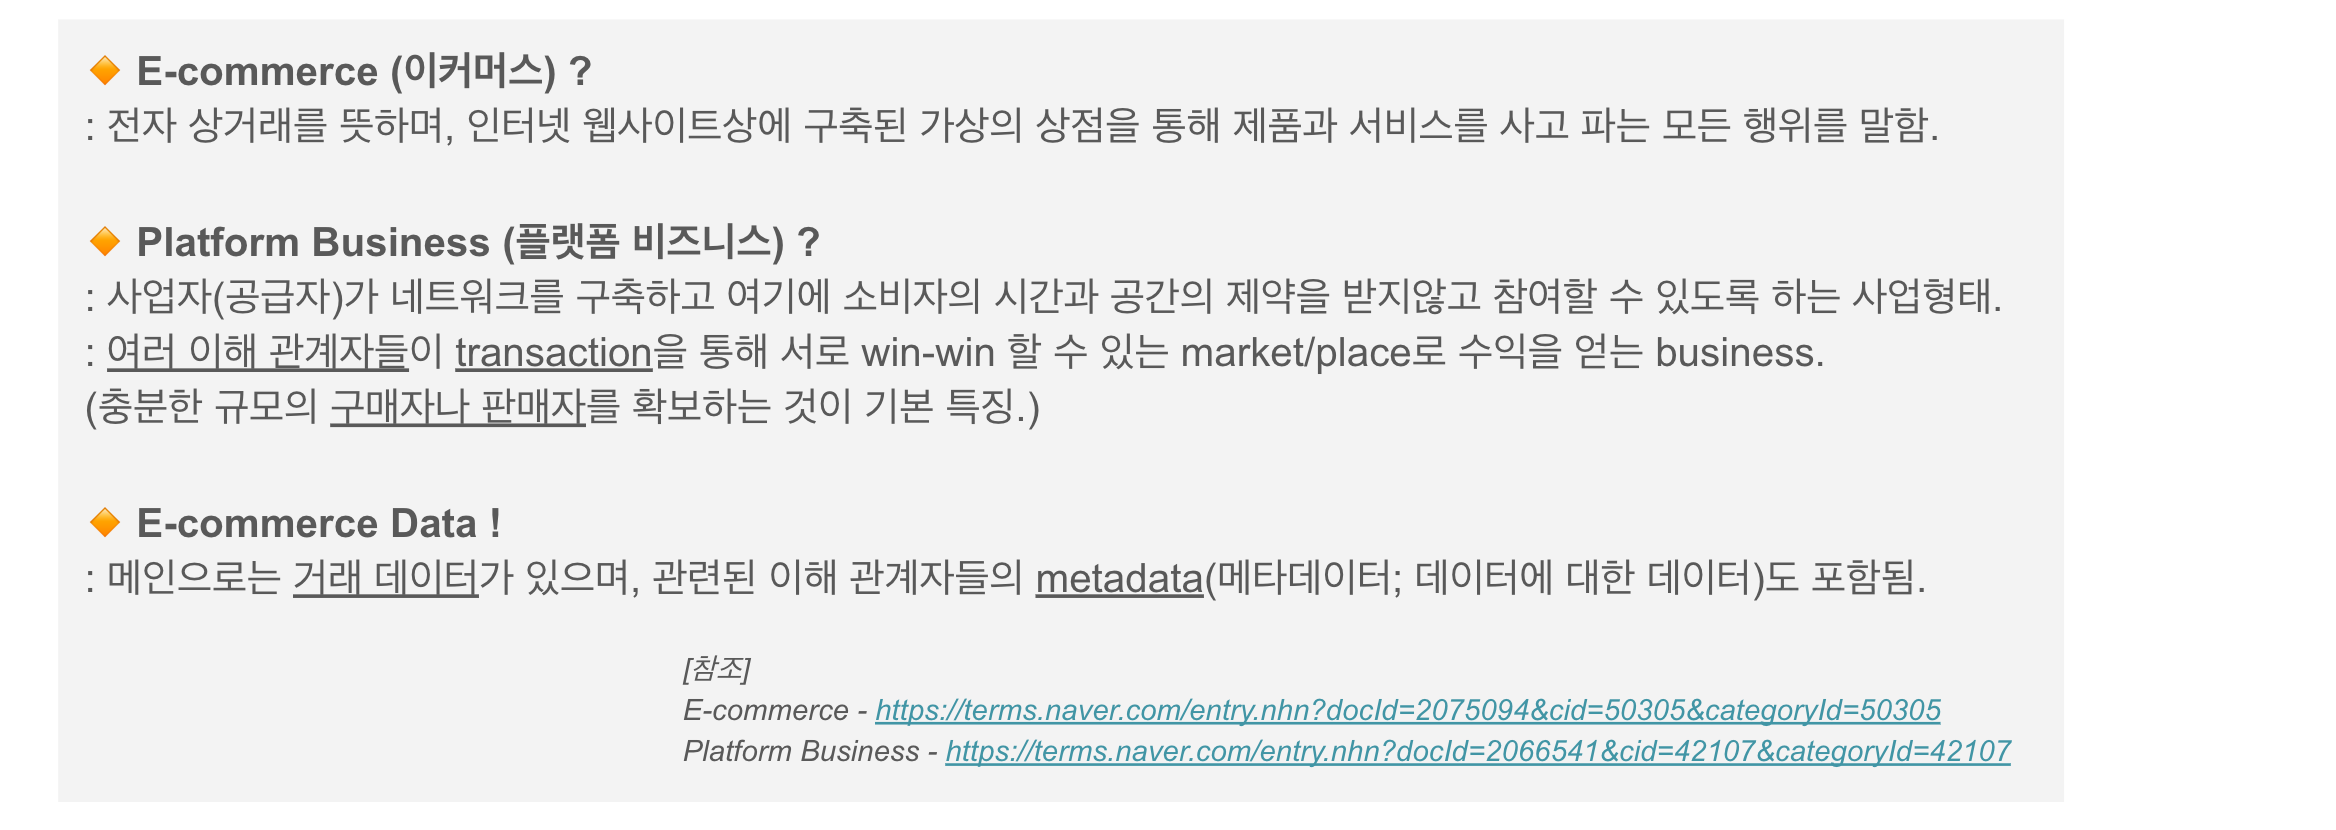

### E-Commerce data의 형태

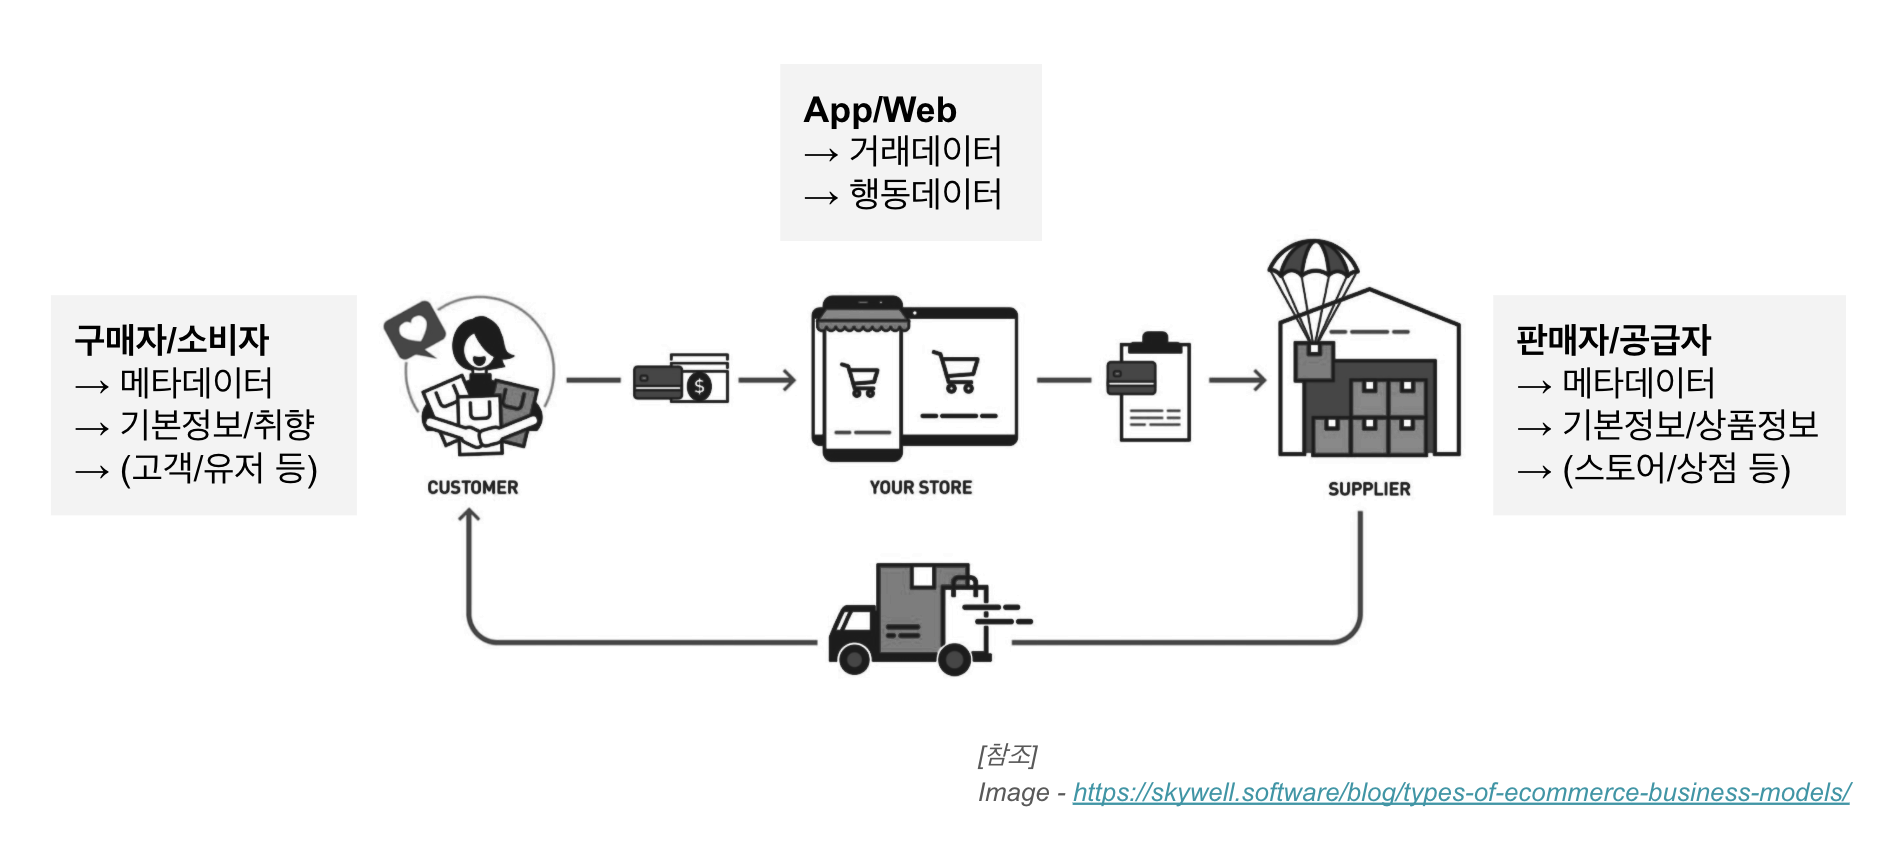

## Step1: E-Commerce 고객(수요) 데이터 불러오기 & 전처리

### 문제 1. E-Commerce 데이터 다운로드 (users)
: 주어진 url을 사용해서 E-Commerce 데이터를 다운로드 받아보세요.

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore') 
pd.set_option('display.max_columns', None)

In [ ]:
# 데이터 url.
user_metadata_url = "https://raw.githubusercontent.com/dajeong-lecture/raw_data/main/user_meta_data.csv"
user_statsdata_url = "https://raw.githubusercontent.com/dajeong-lecture/raw_data/main/user_stats_data.csv"

# 위의 url를 사용해서 각각의 DataFrame을 생성해보세요.
user_metadata_df = 
user_stats_df = 


In [ ]:
# load된 데이터의 형태(shape)을 확인해보세요.


### 문제 2. E-Commerce 고객 메타데이터 둘러보기 (metadata)
: 데이터별 컬럼 명세서를 통해 E-Commerce 고객 메타 데이터를 파악해보세요.

#### [User metadata 컬럼 명세서]  

컬럼명 | 설명
--- | ---
user_id | 고객 고유 ID
sex | 성별 (0:남, 1:여)
birthday_year | 생일년도 (yyyy)
membership_type | 멤버십 타입 (100:비회원, 300-500:정회원)
category_prefer | 카테고리 선호 입력수 (int)
joined_date | 가입일자 (yyyy-mm-dd)
deleted_date | 탈퇴일자 (yyyy-mm-dd)
join_path | 가입경로 (None:일반가입,1:sns가입)
os | os 타입 (IOS, AOS)
recommended_cnt | 친구추천 수 (int)



In [ ]:
# 컬럼의 데이터 타입을 확인해보세요.


### 문제 3. E-Commerce 고객 메타데이터 전처리하기 (metadata)
: E-Commerce 고객 메타 데이터를 분석에 필요한 컬럼을 생성해보세요.

In [ ]:
# 생일년도를 사용해서 2021년 기준 고객의 나이정보를 생성해보세요.




In [ ]:
# 가입일자를 사용해서 2021년 1월 1일 기준 고객의 가입기간을 생성해보세요.
today_ymd = 

# 가입일자의 포멧을 날짜형식('datetime64[ns]')으로 변경해보세요.

# 가입기간을 일(day)로 계산해보세요.

# 가입기간을 년도(year)로 계산해보세요. 
# [참고] np.timedelta64(1, "Y") 를 사용해보세요.




In [ ]:
# 탈퇴일자를 사용해서 2021년 1월 1일 기준 고객의 탈퇴여부를 binary로 나타내보세요.
# [참고] 탈퇴일자는 string 컬럼입니다. 
# user_metadata_df[user_metadata_df["deleted_date"]=="NaT"]
# 1: 탈퇴함, 0: 탈퇴하지 않음
user_metadata_df["if_deleted"] = 


### 문제 4. E-Commerce 고객 거래데이터 둘러보기 (transaction data)
: 데이터별 컬럼 명세서를 통해 E-Commerce 고객 거래 데이터를 파악해보세요.

#### [User stat 컬럼 명세서]  

컬럼명 | 설명
--- | ---
user_id | 고객 고유 ID
membership_type | 멤버십 타입 (100:비회원, 300-500:정회원)
total_order_cnt | 총 거래건수
total_cost | 총 거래금액
avg_coupon_amt | 평균 쿠폰사용 금액
avg_point_amt | 평균 포인트사용 금액
weekly_order_cnt | 주평균 거래건수
monthly_order_cnt | 주평균 거래건수
avg_cost | 평균 거래금액
avg_item_cost | 평균 상품금액
last_date | 마지막 거래일자 (yyyy-mm-dd)



In [ ]:
# 아래 코드로 컬럼의 데이터 타입을 확인해보세요.


### 문제 5. E-Commerce 고객 거래데이터 전처리하기 (transaction data)

In [ ]:
# 마지막 거래일자의 범위를 확인해 보세요.


In [ ]:
# 마지막 거래일자의 가장 오래된 날짜를 선택하여, Recency의 정도를 알아보는 컬럼을 생성해보세요.
# [참고] 기준점이 마지막 거래일자 직전일이 됩니다. (0일이 생기지 않게 하기위해)
oldest_ymd = 

# 날짜컬럼으로 변경하고 Recency 컬럼을 생성해보세요. ('datetime64[ns]')
# 뒤에서 진행할 분석법에서 숫자가 클수록 높은 점수를 부여하기 위해 과거 시간을 기준으로 일수를 역산합니다.




## Step2: Clustering - 고객(수요) 메타데이터를 이용한 군집화



### 문제 6. EDA : 고객(메타데이터) - 1차원에서 살펴보기
: 분류가 되어 있지 않은 데이터이므로, 사전 EDA를 통해 얻게되는 정보가 나중에 군집분석 결과를 해석/이해하는데 도움이 될때가 많습니다.  

```
[TIP] EDA에 사용되는 변수를 기준으로 1차원, 2차원 등 순서대로 EDA를 진행합니다.
```


In [ ]:
# 컬럼별 null값 살펴보세요.

# null값을 채워주세요.


In [ ]:
# 고객 메타데이터 이므로 user_id 기준으로 unique 해야합니다. user_id 기준으로 중복 데이터를 확인해보세요.

# 중복 데이터가 있다면 삭제해주세요.



In [ ]:
# membership_type별 고객 분포를 파악해보세요.


In [ ]:
# 가입기간(years_from_joined)에 따른 고객 분포를 확인해보세요.

user_cnt_from_joined_df = 
fig = px.bar(, x=, y=)
fig.update_layout(height=500, width=1000)
fig.show()

In [ ]:
# 카테고리 선호 입력수(category_prefer)에 따른 고객 분포를 확인해보세요.

user_cnt_by_ctg_df = 
fig = px.bar(, x=, y=)
fig.update_layout(height=500, width=1000)
fig.show()

In [ ]:
# 친구추천 횟수(recommended_cnt)에 따른 고객 분포를 확인해보세요.

user_cnt_by_recomm_df = 
fig = px.bar(, x=, y=)
fig.update_layout(height=500, width=1000)
fig.show()

### 문제 7. EDA : 고객(메타데이터) - 2차원에서 살펴보기

In [ ]:
# 변수간 상관계수를 살펴보세요.




In [ ]:
# 유효한 정보만 확인하는 방법입니다.
# [참고] 상관계수중에 상대적/비교적으로 높은 관계를 찾아보세요.


In [ ]:
# 상관계수를 heatmap으로 나타내보세요.



In [ ]:
# age & category_prefer 관계를 나타내는 scatter plot을 그려보세요.
fig = px.scatter(x=, y=)
fig.update_layout(width=600, height=500)
fig.show()

In [ ]:
# age & recommended_cnt 관계를 나타내는 scatter plot을 그려보세요.
fig = px.scatter(x=, y=)
fig.update_layout(width=600, height=500)
fig.show()

In [ ]:
# sex & join_path (pivot_table() 사용.)


### 문제 8. Clustering : 고객(메타데이터) - 고객 메타데이터 정제 및 데이터셋 분리.

In [ ]:
# 고객 메타데이터에서 군집분석을 위한 변수만 남겨보세요.
# [참고] 아래 리스트(numerics_types)를 사용하여 숫자 형태의 변수만 남겨보세요.
numerics_types = ["int16", "int32", "int64", "float16", "float32", "float64"]



In [ ]:
# 군집화에서 binary변수와 일반 숫자변수를 혼용해서 훈련시키는 것을 지양합니다.
# binary변수를 제거하세요.
# [참고] np.isin()을 활용해보세요.




In [ ]:
# membership_type 변수를 분리해보세요.
# [참고] membership_type을 포함시켜도 되지만, 군집결과와 임의로 비교해볼 y값으로 분리시켜 놓습니다.




In [ ]:
# 남겨진 변수의 평균, 분산등의 정보를 확인해보세요.
# [참고] min/max 값이 다른 변수들과 차이가 많이나는 변수를 기억해주세요.


In [ ]:
# 고객 메타데이터를 X,Y로 나눠보세요.
X = 
Y = 

# train_test_split를 사용하여 데이터를 train/test로 8:2의 비율로 나눠보세요.
train_x, test_x, train_y, test_y = train_test_split()


### 문제 9. Clustering : 고객(메타데이터) - 정제된 메타데이터로 최적의 k 찾기 (Elbow method)

In [ ]:
# K-Means 모듈을 import 합니다.
from sklearn.cluster import KMeans

In [ ]:
# elbow method를 사용하여 최적의 k를 찾아봅시다.
distortions = [] 
k_range = range()





In [ ]:
# elbow method를 그래프로 확인해보세요.
# x축이 k의 수, y축이 distortions인 line plot을 그려봅시다.
fig = px.line(x=, y=, labels={"x":, "y":})
fig.update_layout(width=800, height=500)
fig.show()

### 문제 10. Clustering : 고객(메타데이터) - 정제된 메타데이터로 K-Means 훈련시키기

### 문제 11. Clustering : 고객(메타데이터) - 훈련된 K-Means 결과 확인/해석하기

In [ ]:
# 각 군집의 변수별 중심값을 비교해보세요.
# [참고] 변수별 중심값은 km.cluster_centers_ 를 활용하세요.



### 문제 12. Clustering : 고객(메타데이터) - k를 변경해서 K-Means를 훈련결과 비교하기

In [ ]:
# k를 2-5 혹은 다른 값으로 변경해서 군집의 중심값을 비교해보세요.
km = KMeans(n_clusters = )
km.fit(train_x)


In [ ]:
# 각 군집별 데이터 수도 확인해보세요.
# [참고] K-means는 outlier를 잡지 않기 때문에 (=모든 데이터를 cluster화 시키기 때문에) 각 군집마다 포함된 데이터양을 비교해보면 좋습니다.



### 문제 13. Clustering : 고객(메타데이터) - 최종 훈련모델의 결과를 시각화하기

In [ ]:
# 결정된 최종 k로 훈련시켜보세요.
km = KMeans(n_clusters = )
km.fit(train_x)

In [ ]:
# 중심값을 확인해보세요.


In [ ]:
# 훈련된 모델의 label을 저장해주세요.
train_x["label_from_km"] = 


In [ ]:
# 훈련결과를 시각화로 확인해보세요.
# [참고] 중심값 차이가 큰 변수를 사용하면 차이를 더 확실히 확인할 수 있습니다.
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual-test","K-means cluster"))

fig.add_trace(
    go.Scatter(x=, 
               y=, 
               mode="markers",
               ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=, 
               y=, 
               mode="markers",
               marker=dict(color=),
               ),
    row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

In [ ]:
# 훈련결과를 시각화로 확인해보세요.
fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual-test","K-means cluster"))

fig.add_trace(
    go.Scatter(x=, 
               y=, 
               mode="markers",
               ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=, 
               y=, 
               mode="markers",
               marker=dict(color=),
               ),
    row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

In [ ]:
# 3D 그래프로 변수 3개를 시각화해보세요. 
fig = go.Figure(data=[go.Scatter3d(x=, 
                                   y=, 
                                   z=,
                                   mode='markers',
                                   marker=dict(color=))])
fig.show()

### 문제 14. Clustering : 고객(메타데이터) - 메타데이터 Normalization(정규화) 적용하기

In [ ]:
# Min-Max Normalization 모듈 import.
from sklearn.preprocessing import MinMaxScaler


In [ ]:
# MinMaxScaler를 사용하여 고객 메타데이터의 값들을 0, 1사이의 값으로 정규화 시켜보세요.





In [ ]:
# 정규화시킨 데이터를 train/test set으로 8:2의 비율로 나눠보세요. (train_test_split)
X = 
Y = 

train_x, test_x, train_y, test_y = train_test_split()
print(len(train_x), len(test_x))

### 문제 15. Clustering : 고객(메타데이터) - 정규화된 데이터로 최적의 k 찾기 (kneed 모듈)

In [ ]:
!pip install kneed

In [ ]:
# distortions에 kneed모듈 사용에 필요한 값을 저장해보세요
distortions = [] 
k_range = range()



In [ ]:
# 아래 parameter를 참고하여 kneed 모듈을 사용하여 자동으로 elbow값을 찾아보세요.
from kneed import KneeLocator

# [참고] 파라미터는 curve="convex", direction="decreasing" 로 해보세요.
kneedle = 
print(f"최적의 k : {round(kneedle.elbow, 3)}")
print(f"최적의 k의 y값 : {round(kneedle.elbow_y, 3)}")

In [ ]:
# 시각화로 최적의 k를 확인해보세요.
kneedle.plot_knee()

### 문제 16. Clustering : 고객(메타데이터) - 정제된 메타데이터로 최적의 k 찾기 (Silhouette method)

In [ ]:
# SilhouetteVisualizer 사용해서 훈련(training)과 그래프를 한번에 해결해보세요.
from yellowbrick.cluster import SilhouetteVisualizer

# k의 범위를 지정해주세요.
# [주의!] 최소 2개이상의 label/cluster가 있어야 합니다.
k_range = range()
for i in k_range:
    km = KMeans(n_clusters=i, init="k-means++")
    

### 문제 17. Clustering : 고객(메타데이터) - 정규화된 데이터로 훈련된 K-Means 결과 확인/해석하기

In [ ]:
# kneed모듈로 정해진 최적의 k로 재훈련시켜보세요.



In [ ]:
user_metadata_cluser_centers = 


In [ ]:
# 훈련된 모델의 label을 저장해주세요.
user_metadata_label_df = 



In [ ]:
# 변수별로 변동성을 확인해보세요.
# [참고] 변수가 많거나 클러스터 종류가 많을 경우에 참고하기에 좋습니다.


In [ ]:
# 훈련결과를 시각화로 확인해보세요.
fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual-test","K-means cluster"))

fig.add_trace(
    go.Scatter(x=, 
               y=, 
               mode="markers",
               ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=, 
               y=, 
               mode="markers",
               marker=dict(color=),
               ),
    row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

In [ ]:
# 훈련결과를 시각화로 확인해보세요.
fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual-test","K-means cluster"))

fig.add_trace(
    go.Scatter(x=, 
               y=, 
               mode="markers",
               ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=, 
               y=, 
               mode="markers",
               marker=dict(color=),
               ),
    row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

In [ ]:
# 3개의 변수로 3D 시각화를 확인해보세요.
fig = go.Figure(data=[go.Scatter3d(x=, 
                                   y=, 
                                   z=,
                                   mode="markers",
                                   marker=dict(
                                            size=5,
                                            color=,
                                            opacity=0.7
                                        )
                                    )])
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(
                    xaxis = dict(
                        title="category_prefer"),
                    yaxis = dict(
                        title="years_from_joined"),
                    zaxis = dict(
                        title="age"),),
                )
fig.show()

### 문제 18. Clustering : 고객(메타데이터) - 훈련된 모델에 test set을 사용해 predict 하기

In [ ]:
# [문제 17]의 모델을 그대로 사용하여 prediction을 해보세요.
test_user_metadata_label_df = 
test_cluster = 


In [ ]:
# [문제 17]과 동일하게 그래프로 prediction결과를 비교해보세요.
fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual-test","K-means cluster-test"))

fig.add_trace(
    go.Scatter(x=, 
               y=, 
               mode="markers",
               marker=dict(color=),
               ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=, 
               y=, 
               mode="markers",
               marker=dict(color=),
               ),
    row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

In [ ]:
# 훈련결과 label을 원데이터셋에 추가해주세요.
trained_user_metadata_df = 



## Step3: Clustering - 고객(수요) 거래데이터를 이용한 군집화.
: Step3에서는 고객 거래데이터를 사용합니다. HDBSCAN 모델을 훈련시키고 최적의 파라미터를 찾는 방법을 반복하여, 가장 적합한 모델로 훈련시킵니다.

### 문제 19. Clustering : 고객(거래데이터) - HDBSCAN 모델 install & 데이터 셋 분리하기
: HDBSCAN 모듈을 설치하고 고객 거래데이터를 train&test set 으로 분리하세요.

In [ ]:
!pip install hdbscan

In [ ]:
# 고객 거래데이터를 살펴보세요. (user_stats_df)


In [ ]:
# 거래 데이터의 컬럼과 모델 훈련에 필요한 컬럼을 선택해보세요.
# [참고] 수치화되지 않은 컬럼을 제외하세요.


In [ ]:
# 선택한 컬럼으로 데이터셋을 나눠주세요.

stats_columns = 

X = 
Y = 

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2)
print(len(train_x), len(test_x))

In [ ]:
# 결과 라벨을 저장하기 위한 dataframe을 생성합니다.


### 문제 20. Clustering : 고객(거래데이터) - HDBSCAN 모델 파라미터 탐색하기
: 고객 거래데이터의 clustering을 위해 HDBSCAN 모듈을 훈련시키고 파라미터를 탐색해보세요.

In [ ]:
# hdbscan 모듈을 import 합니다.
import hdbscan

In [ ]:
# min_samples 파라미터를 비교하는 함수를 만들어보세요.
# [참고] min_cluster_size=30, label_name="hdbscan_label", x_col="total_order_cnt" , y_col="total_cost" 로 설정해주세요. 

def opt_hdbscan(train_x, ms_list, data_df, min_cluster_size=30, label_name="hdbscan_label", x_col="total_order_cnt" , y_col="total_cost"):
  for ms in ms_list: 
    
  return data_df

In [ ]:
# 만든 함수로 파라미터를 비교해보세요.
ms_list = []
hdb_data_df = opt_hdbscan(train_x, ms_list, hdb_data_df, label_name="hdbscan_label", x_col="avg_cost" , y_col="total_cost")


### 문제 21. Clustering : 고객(거래데이터) - HDBSCAN 모델에 원데이터 훈련시키기

In [ ]:
ms = 
hdbscan_label = hdbscan.HDBSCAN()



In [ ]:
# outlier 추세확인.


# 시각화하기.
fig = px.scatter(, x=, y=, color=)
fig.update_layout(width=600, height=500, title=f"min_samples={ms} > label수: {len(set(hdbscan_label))}, outlier: {outliers}")
fig.show()

# 군집별 데이터 분포 확인.
hdb_cluster_df = 



### 문제 22. Clustering : 고객(거래데이터) - 원데이터에서 불필요한 정보 제거하기
: 변별력이 없고 영향력이 작은 변수들을 제거하고(변수정리측면) 치우친 데이터를 거르는 과정을(데이터 측면) 거쳐봅니다.

In [ ]:
# 변수간 상관계수를 살펴보세요.
# [참고] 변수간 상관관계가 높은 경우를 중점적으로 제외해봅니다.



In [ ]:
# 남기고 싶은 변수만으로 HDBSCAN을 다시 훈련시켜보세요.
selected_stats_columns = []

X = 
Y = 

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2)
print(len(train_x), len(test_x))

In [ ]:
# [문제 21]에서 만든 함수를 사용해서 파라미터를 비교해보세요.

hdb_data_df = train_x.copy()

ms_list = []
hdb_data_df = opt_hdbscan()


In [ ]:
# 남기고 싶은 변수를 설정하세요.
selected_stats_columns = []

# total_order_cnt의 기준을 정해서 데이터를 걸러주세요.


X = 
Y = 

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2)
print(len(train_x), len(test_x))

In [ ]:
# 결과 라벨을 저장하기 위한 dataframe을 생성합니다.


In [ ]:

ms_list = []
hdb_data_df = opt_hdbscan()


### 문제 23. Clustering : 고객(거래데이터) - Normalization(정규화) 적용하기
: 고객 거래데이터에 정규화를 적용해서 모델을 훈련시켜보세요.

In [ ]:
# 정규화에 사용되는 모듈 import.
from sklearn.preprocessing import StandardScaler

In [ ]:
# StandardScaler를 사용하여 [문제 22]에서 사용된 데이터를 정규화 시켜보세요.
X = 
Y = 



In [ ]:
# 인덱스가 초기화되었기 때문에 원래 인덱스로 할당해 줍니다. (원데이터 찾아가는 과정에서 사용할 수 있습니다.)


In [ ]:
# 정규화된 데이터셋을 train/test set으로 나눠주세요.
train_x, test_x, train_y, test_y = train_test_split()
print(len(train_x), len(test_x))

In [ ]:
# 결과 라벨을 저장하기 위한 dataframe을 생성합니다.


In [ ]:

ms_list = []
scaled_hdb_data_df = opt_hdbscan()


### 문제 24. Clustering : 고객(거래데이터) - HDBSCAN 모델에 정규화된 데이터 훈련시키기

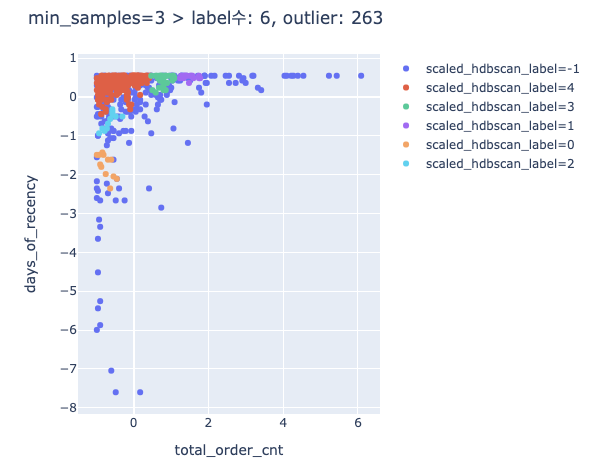

In [ ]:
ms=



In [ ]:
# outlier 추세확인.
hdbscan_case_dict = 

# 시각화하기.
# x_col="total_order_cnt" , y_col="days_of_recency"
fig = px.scatter(, x=, y=, color=)
fig.update_layout(width=600, height=500, title=f"min_samples={ms} > label수: {len(set(hdbscan_label))}, outlier: {outliers}")
fig.show()

# 군집별 데이터 분포 확인.
trim_hdb_cluster_df = 

In [ ]:
# 시각화 하고자하는 변수를 선택하세요.
COL_LIST = []
LABEL_COLOR = {0:"red", 1:"green", 2:"blue", 3:"yellow", 4:"coral", -1:"grey"}

# 변수별로 시각화를 해보세요.
# [참고] for loop을 사용해서 subplot을 생성해보세요. (rows=len(COL_LIST)-1, cols=len(COL_LIST))
fig = make_subplots(rows=4, cols=5)

# i: x축이될 변수명.
for i in range(0, len(COL_LIST)+1):
  # i=5이면 중지.
  if i == len(COL_LIST): break
  x_col = COL_LIST[i]
  # j: y축이될 변수명.
  for j in range(i, len(COL_LIST)+1):
    # j=5이면 중지.
    if j == len(COL_LIST): break
    y_col = COL_LIST[j]
    # label별로 색깔 할당.
    for c in range(0, len(set(hdbscan_label))):
      sub_df = scaled_hdb_data_df[scaled_hdb_data_df["scaled_hdbscan_label"]==f"{c-1}"]
      fig.add_trace(
          go.Scatter(x=sub_df[x_col], 
                    y=sub_df[y_col], 
                    mode="markers",
                    marker=dict(color=LABEL_COLOR[c-1], opacity=0.5),
                    name=f"{c-1}", 
                    legendgroup=f"{c-1}",

                    ),
          row=i+1, col=j+1
      )
    fig.update_xaxes(title_text=f"{x_col}", row=i+1, col=j+1)
    fig.update_yaxes(title_text=f"{y_col}", row=i+1, col=j+1)

fig.update_layout(height=1500, width=1500)
fig.show()


### 문제 25. Clustering : 고객(거래데이터) - HDBSCAN 모델에 test 데이터 예측하기

In [ ]:
# label을 저장할 test set을 복사해주세요.
test_hdb_data_df 

# 위에서 훈련한 모델을 사용하여 test set(test_x)의 label을 예측해보세요.
# [참고] hdbscan.approximate_predict()를 사용해보세요.


# label 결과를 저장하고 그래프를 그리기 위해 label을 string 포멧으로 변경해주세요.



In [ ]:
# 시각화하기.
fig = px.scatter(, x=, y=, color=)
fig.update_layout(width=600, height=500, title=f"Predicted label for test set")
fig.show()

# 군집별 데이터 분포 확인.




In [ ]:
# 훈련결과 label을 원데이터셋에 추가해주세요.
trained_user_stats_df = 


In [ ]:
# label이 없는 데이터수를 확인합니다.


## Step4: Clustering - 고객(수요) 거래데이터를 활용한 RMF 분석

### RFM 분석 기초 이해하기  
: 고객 분석의 기본으로 사용되는 RFM 분석 내용을 이해해보세요.


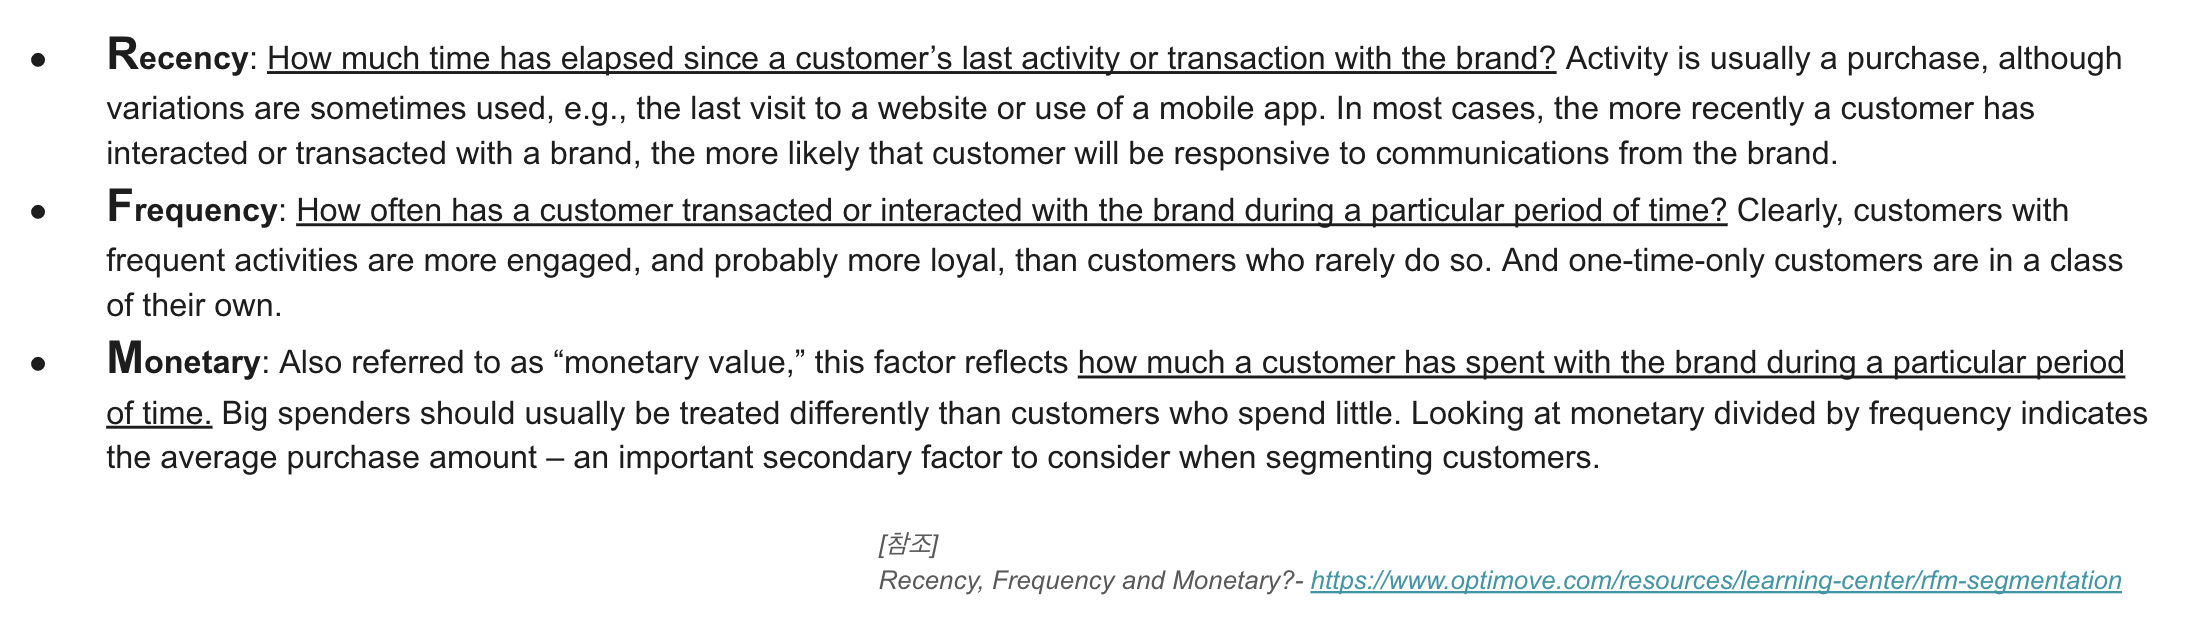

### 문제 26. EDA : 고객(거래데이터) - RFM 분석을 하기 위한 데이터 생성하기

In [ ]:
# R(Recency), F (Frequency), M (Monetary) 변수를 생성해보세요.
# [참고] 거래데이터 기간동안의 RFM을 계산하세요.
user_rfm_df = 

### 문제 27. Clustering : 고객(거래데이터) - RFM 컬럼으로 K-Means 훈련시켜보기

In [ ]:
# 생성된 RFM 컬럼만 사용해서 K-means를 훈련시켜보세요.
rfm_columns = []


In [ ]:
# 각 군집별 데이터 수를 확인해보세요.
# [참고] k를 변경해보면서 비교해보세요.



### 문제 28. Clustering : 고객(거래데이터) - RFM 컬럼에 custom Normalization(정규화) 적용하기  
: 단위가 다른 RFM 컬럼을 비지니스 특성을 반영하여 custom Normalization(정규화) (or 점수화) 시켜보세요. (i.e., 단가, 리텐션 등)

In [ ]:
# 컬럼별 분위수/최대값/최소값 등을 확인해보세요.


In [ ]:
## [R]
## 방법1: qcut으로 동일 데이터수로 점수할당.
# [참고] qcut을 사용해 나눌경우, 동일한 숫자가 걸쳐질 경우 나누기 어려움. 


# 계산된 R_score의 분포를 살펴보세요.
grouped_recen = 

In [ ]:
## 방법2: cut으로 custom 점수할당.
user_rfm_df["R_score"] = 



In [ ]:
## [F]
## 방법2: cut으로 custom 점수할당.
user_rfm_df["F_score"] = 

## 방법3: 분위수로 결정.



In [ ]:
## [M]
# Monetary 분위수를 확인해보세요.


In [ ]:
## 방법2: cut으로 custom 점수할당.
user_rfm_df["M_score"] = 

### 문제 29. Clustering : 고객(거래데이터) - 정규화된 RFM 데이터셋 나누기
: 모델 훈련을 위해 정규화된 데이터 셋을 train/test로 분리해보세요.

In [ ]:
# RFM 데이터를 X,Y로 나눠보세요.
rfm_score_columns = []
X = 
Y = 

# train_test_split를 사용하여 데이터를 train/test로 8:2의 비율로 나눠보세요.
train_x, test_x, train_y, test_y = train_test_split()
print(len(train_x), len(test_x))

### 문제 30. Clustering : 고객(거래데이터) - 정규화된 데이터로 최적의 k 찾기 (kneed 모듈)

In [ ]:
# distortions에 kneed모듈 사용에 필요한 값을 저장해보세요
distortions = [] 
k_range = range()



In [ ]:
kneedle = KneeLocator(x=, y=, curve=, direction=)
print(f"최적의 k : {round(kneedle.elbow, 3)}")
print(f"최적의 k의 y값 : {round(kneedle.elbow_y, 3)}")

In [ ]:
# 시각화로 최적의 k를 확인해보세요.


### 문제 31. Clustering : 고객(거래데이터) - 정제된 RFM 데이터로 최적의 k 찾기 (Silhouette method)

In [ ]:
# k의 범위를 지정해주세요.
# [주의!] 최소 2개이상의 label/cluster가 있어야 합니다.
k_range = range()
for i in k_range:
    km = KMeans(n_clusters=i, init="k-means++")
    

### 문제 32. Clustering : 고객(거래데이터) - 정규화된 데이터로 훈련된 K-Means 결과 확인/해석하기

In [ ]:
# 위의 결과를 조합하여 결정한 최적의 k로 k-means를 훈련시켜보세요.
model = KMeans(n_clusters = )


In [ ]:
model = KMeans(n_clusters = )


### 문제 33. Clustering : 고객(거래데이터) - K-Means 모델에 test 데이터 예측하기

In [ ]:
# [문제 32]의 모델을 그대로 사용하여 prediction을 해보세요.
test_cluster = 




In [ ]:
# 시각화를 위해 색깔을 지정해주세요.
LABEL_COLOR = {0:"red", 1:"green", 2:"blue", 3:"yellow", 4:"orange", 5:"silver"}
rfm_test_df["km_label_color"] = 

In [ ]:
# 3D 그래프로 변수 3개를 시각화해보세요. 
fig = go.Figure(data=[go.Scatter3d(x=, 
                                   y=, 
                                   z=,
                                   mode='markers',
                                   marker=dict(color=, opacity=0.5))])

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(
                    xaxis = dict(
                        title="R_score"),
                    yaxis = dict(
                        title="F_score"),
                    zaxis = dict(
                        title="M_score"),),
                )

fig.show(showlegend=True)

In [ ]:
# 훈련결과 label을 원데이터셋에 추가해주세요.
trained_rfm_df = 


## Step5: 활용사례 - 고객 군집화를 통해 맴버십 등급의 특징을 파악
: Step2, 3, 4의 결과를 사용하여 맴버십 등급별 특징을 확인해보세요.

### Labeling된 데이터 불러오기

In [ ]:
# 데이터 url.
user_metadata_with_labels_url = "https://raw.githubusercontent.com/dajeong-lecture/raw_data/main/user_metadata_with_labels.csv"
user_stats_with_labels_url = "https://raw.githubusercontent.com/dajeong-lecture/raw_data/main/user_stats_with_labels.csv"
user_rfm_with_labels_url = "https://raw.githubusercontent.com/dajeong-lecture/raw_data/main/user_rfm_with_labels.csv"

# 위의 url를 사용해서 각각의 labeling된 DataFrame을 생성해보세요.
trained_user_metadata_df = pd.read_csv(user_metadata_with_labels_url, parse_dates=[0])
trained_user_stats_df = pd.read_csv(user_stats_with_labels_url, parse_dates=[0])
trained_rfm_df = pd.read_csv(user_rfm_with_labels_url, parse_dates=[0])

### 문제 34. 메타데이터 그룹의 특징으로 naming해보기.

In [ ]:
# Step 2 - user metadata


In [ ]:
# [문제 18]을 참고해서 메타데이터 그룹을 구분지을 변수를 선택하고 그룹별로 비교해보세요.
# [참고] category_prefer, years_from_joined, age



In [ ]:
# 메타데이터 그룹의 명칭을 할당하세요.


### 문제 35. 메타데이터와 고객 맴버십 등급의 연관성을 찾아보세요.

In [ ]:
ttl_membership_cnt = 

In [ ]:
metadata_pivot_df = 

In [ ]:

metadata_pivot_df

### 문제 36. 거래데이터 그룹의 특징으로 naming해보기

In [ ]:
# label이 없는 그룹의 그룹명을 임의로 할당해주세요 (i.e., 99)
trained_user_stats_df["scaled_hdbscan_label"] = 



In [ ]:
# [문제 25]을 참고해서 거래데이터 그룹을 구분지을 변수를 선택하고 그룹별로 비교해보세요.
# [참고] total_order_cnt, days_of_recency, avg_cost


In [ ]:
# 메타데이터 그룹의 명칭을 할당하세요.


In [ ]:
trained_user_stats_df.head(3)

### 문제 37. 거래데이터와 고객 맴버십 등급의 연관성을 찾아보세요.

In [ ]:
ttl_membership_cnt = 

In [ ]:
user_stats_pivot_df = 

In [ ]:

user_stats_pivot_df

### 문제 38. RFM 그룹의 특징으로 naming해보기

In [ ]:
# label이 없는 그룹의 그룹명을 임의로 할당해주세요 (i.e., 99)


In [ ]:
# [문제 33]을 참고해서 거래데이터 그룹을 구분지을 변수를 선택하고 그룹별로 비교해보세요.
# [참고] total_order_cnt, days_of_recency, avg_cost


In [ ]:
# 메타데이터 그룹의 명칭을 할당하세요.


In [ ]:
trained_rfm_df.head(3)

### 문제 39. RFM 그룹과 고객 맴버십 등급의 연관성을 찾아보세요.

In [ ]:
rfm_pivot_df = 

In [ ]:

rfm_pivot_df

## Chapter02 마무리
- 고객 관련된 데이터는 다양한 종류가 있습니다. (메타데이터, 거래데이터 등)
- 상황에 따라 제공되는 파라미터로 모델 성능을 향상시키기 어려운 경우도 많습니다. 이럴때 데이터 transform이 도움이 될 수 있습니다.
- raw 데이터를 그대로 사용하기 보다 상황에 맞게 transform해서 사용하는 것이 중요합니다.
- 분류되지 않은 데이터이기 때문에 분류의 목적성(i.e., 맴버십 평가 등)을 잃지 않는 것이 중요합니다.